In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
multip = pd.read_parquet("multip.parquet")
multip

,value
timestamp,
2021-06-26 00:00:00,0.000000
2021-06-26 00:02:00,0.000000
2021-06-26 00:04:00,0.000000
2021-06-26 00:06:00,0.000000
2021-06-26 00:08:00,0.000000
...,...
2021-06-26 23:50:00,0.086179
2021-06-26 23:52:00,0.039024
2021-06-26 23:54:00,0.007317


In [3]:
naive = pd.read_parquet("naive.parquet")
naive

,unknown
time,
2021-06-26 00:00:00,0.000000
2021-06-26 00:02:00,0.000000
2021-06-26 00:04:00,0.000000
2021-06-26 00:06:00,0.000000
2021-06-26 00:08:00,0.000000
...,...
2021-06-26 23:50:00,0.086179
2021-06-26 23:52:00,0.039024
2021-06-26 23:54:00,0.007317


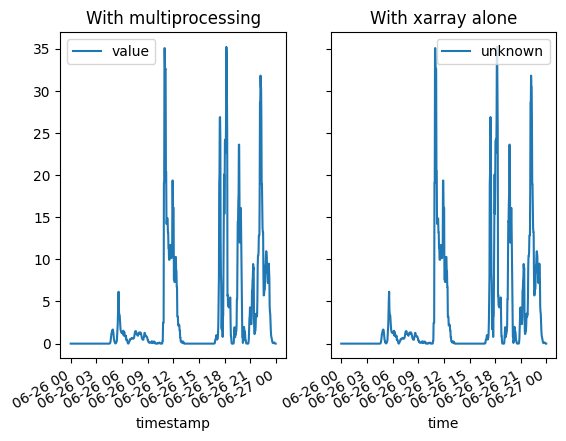

In [ ]:
fig, (lax, rax) = plt.subplots(1, 2, sharex=True, sharey=True)
multip.plot(ax=lax, title="With multiprocessing")
naive.plot(ax=rax, title="With xarray alone")
plt.show()

<Axes: xlabel='time'>

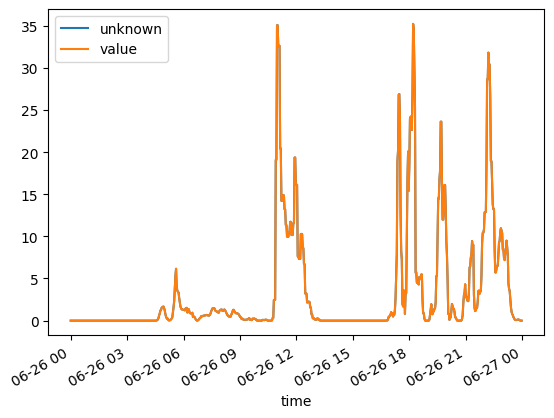

In [ ]:
df = pd.concat([naive, multip], axis="index")
df = naive.join(multip, lsuffix="NAIVE", rsuffix="CRAZY")
df.plot()